In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import time
import tensorflow as tf

In [2]:
NAME = "catsVdogs-{}".format(int(time.time()))

In [3]:
from tensorflow.keras.callbacks import TensorBoard

In [4]:
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

In [5]:
DATADIR = "/Users/Th3D4rKnight/Desktop/msDCdataset/PetImages"
CATEGORIES = ["Dog","Cat"]

In [6]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.33)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

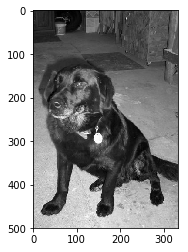

In [7]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break 

In [8]:
print(img_array.shape)

(500, 333)


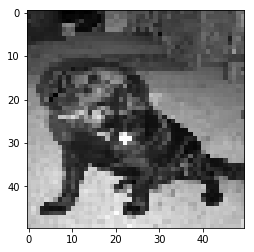

In [9]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [10]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                IMG_SIZE = 50
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()            

In [11]:
print(len(training_data))

24946


In [12]:
import random

In [13]:
random.shuffle(training_data)

In [14]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
1
0
1
1
0
1
1


In [15]:
X = []
y = []

In [16]:
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [17]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation,Flatten,Conv2D,MaxPooling2D
import pickle

X = X/255.0
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
model.fit(X,y,batch_size=32,epochs=3,validation_split=0.1,callbacks=[tensorboard])

Train on 22451 samples, validate on 2495 samples
Epoch 1/3
22451/22451 [==============================] - 169s 8ms/step - loss: 0.6287 - acc: 0.6430 - val_loss: 0.5593 - val_acc: 0.7102
Epoch 2/3
22451/22451 [==============================] - 159s 7ms/step - loss: 0.5303 - acc: 0.7385 - val_loss: 0.4797 - val_acc: 0.7731
Epoch 3/3
22451/22451 [==============================] - 159s 7ms/step - loss: 0.4815 - acc: 0.7706 - val_loss: 0.4610 - val_acc: 0.7828


In [26]:
def prepare(filepath):
    img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img_array, cmap="gray")
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)

Dog


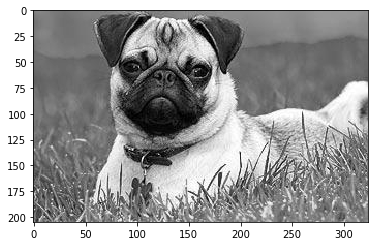

In [29]:
prediction  = model.predict([prepare('dog.jpg')])
print(CATEGORIES[int(prediction[0][0])])

Cat


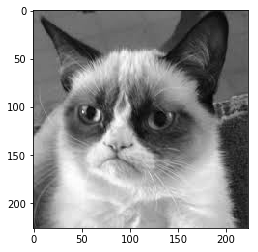

In [30]:
prediction  = model.predict([prepare('cat.jpeg')])
print(CATEGORIES[int(prediction[0][0])])